# Final Code

In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Sequential

import numpy as np
import matplotlib.pyplot as plt

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#adding some noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)


In [3]:
model2 = Sequential()
model2.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
model2.add(MaxPooling2D((2, 2), padding='same'))
model2.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model2.add(MaxPooling2D((2, 2), padding='same'))
model2.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model2.add(MaxPooling2D((2, 2), padding='same'))    # 4,4,8
model2.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model2.add(UpSampling2D((2, 2)))
model2.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model2.add(UpSampling2D((2, 2)))
model2.add(Conv2D(32, (3, 3), activation='relu'))
model2.add(UpSampling2D((2, 2)))
model2.add(Conv2D(1, (3, 3), activation='relu', padding='same'))

model2.compile(optimizer='adam', loss='mean_squared_error')
model2.evaluate(x_test,x_test)

model2.fit(x_train, x_train, epochs=10, batch_size=256, shuffle=True,
         validation_data=(x_test,x_test))

model2.summary()

313/313 [==============================] - 6s 17ms/step - loss: 0.1140
Epoch 1/10
235/235 [==============================] - 75s 317ms/step - loss: 0.0870 - val_loss: 0.0352
Epoch 2/10
235/235 [==============================] - 89s 377ms/step - loss: 0.0269 - val_loss: 0.0223
Epoch 3/10
235/235 [==============================] - 114s 488ms/step - loss: 0.0209 - val_loss: 0.0193
Epoch 4/10
235/235 [==============================] - 126s 536ms/step - loss: 0.0185 - val_loss: 0.0176
Epoch 5/10
235/235 [==============================] - 171s 728ms/step - loss: 0.0172 - val_loss: 0.0164
Epoch 6/10
235/235 [==============================] - 125s 532ms/step - loss: 0.0162 - val_loss: 0.0155
Epoch 7/10
235/235 [==============================] - 138s 587ms/step - loss: 0.0155 - val_loss: 0.0149
Epoch 8/10
235/235 [==============================] - 145s 618ms/step - loss: 0.0150 - val_loss: 0.0146
Epoch 9/10
235/235 [==============================] - 131s 548ms/step - loss: 0.0145 - val_loss: 0.

In [7]:
from keras.models import Model
encoder=Model(inputs=model2.get_layer('conv2d').input,outputs=model2.get_layer('conv2d_3').output)
decoder=Model(inputs=model2.get_layer('conv2d_3').output,outputs=model2.get_layer('conv2d_6').output)

In [8]:
compressed_img_train = encoder.predict(x_train)
compressed_img_test = encoder.predict(x_test)

# decoder.evaluate(x_test,x_test)
reconstructed_img = decoder.predict(compressed_img_test)

313/313 [==============================] - 4s 11ms/step


# Encoder output

313/313 [==============================] - 3s 9ms/step


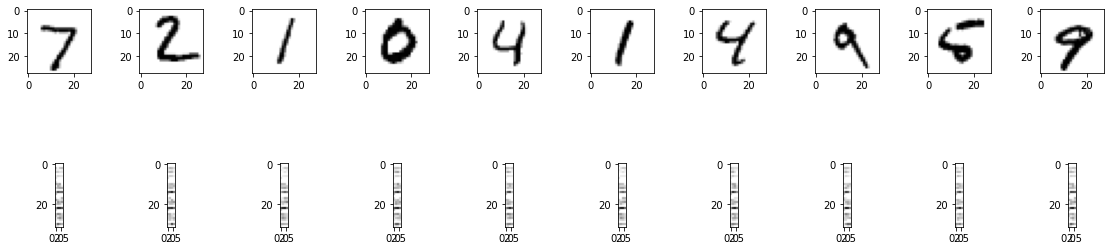

In [9]:
## encoder output
compressed_img = encoder.predict(x_test)
plt.figure(figsize=(40, 4))
for i in range(10):
    # display original
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap="binary")
    
    # display compressed image
    ax = plt.subplot(3, 20, 40 +i+ 1)
    plt.imshow(compressed_img[i].reshape((4, 4 * 8)).T, cmap="binary")
plt.show()


# Decoder output 

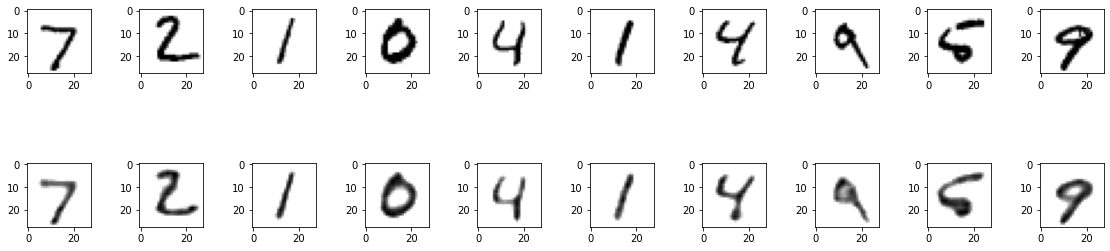

In [10]:
##decoder output
plt.figure(figsize=(40, 4))
for i in range(10):
    # display original
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap="binary")
    
    # display reconstructed image
    ax = plt.subplot(3, 20, 40 +i+ 1)
    plt.imshow(reconstructed_img[i].reshape(28, 28), cmap="binary")

plt.show()

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Sequential

import numpy as np
import matplotlib.pyplot as plt

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

#adding some noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

#Displaying images with noise
plt.figure(figsize=(20, 2))
for i in range(1,10):
    ax = plt.subplot(1, 10, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap="binary")
plt.show()


model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
 
model.add(MaxPooling2D((2, 2), padding='same'))
 
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(1, (3, 3), activation='relu', padding='same'))

model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()

model.fit(x_train_noisy, x_train, epochs=10, batch_size=256, shuffle=True, 
          validation_data=(x_test_noisy, x_test))


model.evaluate(x_test_noisy, x_test)

model.save('denoising_autoencoder.model')

no_noise_img = model.predict(x_test_noisy)

plt.figure(figsize=(40, 4))
for i in range(10):
    # display original
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap="binary")
    
    # display reconstructed (after noise removed) image
    ax = plt.subplot(3, 20, 40 +i+ 1)
    plt.imshow(no_noise_img[i].reshape(28, 28), cmap="binary")

plt.show()
# https://www.youtube.com/watch?v=Sm54KXD-L1k